<a href="https://colab.research.google.com/github/bricktoast/Test-Drift-Rates/blob/main/PyAstronomy_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#general utility packages
import numpy as np
import matplotlib.pyplot as plt

#nice modules from astropy
import astropy.units as u
import astropy.constants as const

#remind matplotlib how to do 3D plotting
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
!pip install PyAstronomy
import PyAstronomy
from PyAstronomy import pyasl

     |████████████████████████████████| 716kB 4.2MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504498 sha256=8f0ce6df2d3d0b4d073725fad6dbfb5e78da15a1c51b1a179f628015c5f28b65
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built PyAstronomy


In [15]:
%matplotlib inline

In [ ]:
G = const.G
c = const.c

Parameters should be in units of au, years, and degrees 

---


e is the eccentricity of the orbit


---

omega is longitude of ascending node in degrees

---


i is inclination in degrees

---

w is argument is periapse in degrees


---

num_timestep is the number of data points to build the elipse


---

index is the number of the point you want to sample



In [ ]:
# I decided to combine the building step and the sampling step because the "build" function would just be the same as the py.asl KE function
def build_and_sample_ellipse(semimajor, period, e, omega, i, w, num_timestep, index):
    ke = pyasl.KeplerEllipse(semimajor, period, e, Omega = omega,i = i,w = w)
    # Build the ellipse
    t = np.linspace(0, period, num_timestep)
    # Make a time axis
    pos = ke.xyzPos(t)
    # Marks data points at each timestep
    return 'x, y, z for point ' + str(index) + ':' + str(pos[index,::])


In [ ]:
# Testing the function on the parameters from the example
print(build_and_sample_ellipse(1, 1, 0.05, 0, 90, 0, 200, 50))

x, y, z for point 50:[-1.07777728e-01  6.10535892e-17  9.97080779e-01]


In [ ]:
# This function will build and plot the ellipse
def build_and_plot_ellipse(semimajor, period, e, omega, i, w, num_timestep):
    ke = pyasl.KeplerEllipse(semimajor, period, e, Omega = omega,i = i,w = w)
    # Build the ellipse
    t = np.linspace(0, period, num_timestep)
    # Make a time axis
    pos = ke.xyzPos(t)
    # Marks data points at each timestep
    plt.figure()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-1.5,1.5))
    plt.ylim((-1.5,1.5))
    plt.title("Appearance of the orbit on the sky (to Earth observer)")
    plt.plot([0], [0], 'k+', markersize=9)
    plt.plot(pos[::, 0], pos[::, 1], 'bo')
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title("3D Orbit - observer is in the +z direction")
    ax.scatter(0, 0, 0, color='black', marker='+')
    ax.scatter3D(pos[::, 0], pos[::, 1], pos[::, 2], color='blue')
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    ax.set_zlim((-1,1))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    return

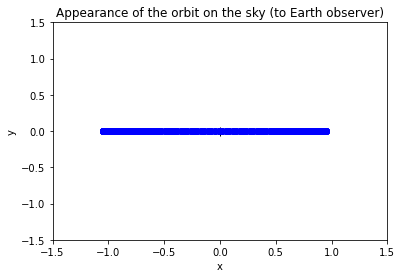

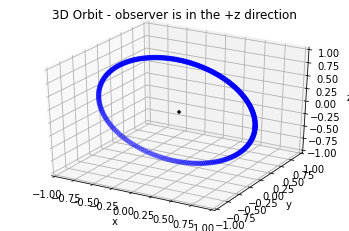

In [16]:
build_and_plot_ellipse(1, 1, 0.05, 0, 90, 0, 200)
plt.show()